        month  year  delivered  return  discrepency  revenue month-year
0        June  2022      10843    3185         4635  4879350   Jun-2022
1        July  2022      12030    3047         5006  5413500   Jul-2022
2      August  2022       7444    2138         2110  3349800   Aug-2022
3   September  2022      10572    2697         4248  4757400   Sep-2022
4     October  2022       6258    2429         2617  2816100   Oct-2022
5    November  2022       3997    1460          136  1798650   Nov-2022
6    December  2022       4358    1641         1697  1961100   Dec-2022
7     January  2023       4597    1847         1844  2068650   Jan-2023
8    February  2023       4350    1311          477  1957500   Feb-2023
9       March  2023       5078    2505         4228  2285100   Mar-2023
10      April  2023       4542    1569            0  2043900   Apr-2023
11        May  2023       6687    2154            0  3009150   May-2023
12       June  2023       5346    1982            0  2405700   J

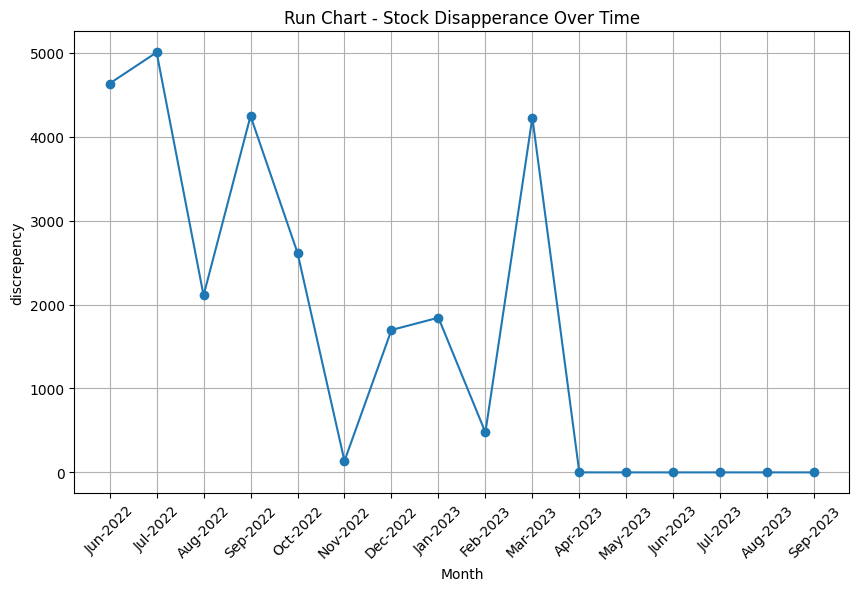

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load data
url = "/content/drive/MyDrive/BDM Capstone/Processed Raw data/stock and revenue - Sheet1.csv"  # replace with your CSV file URL or path
stock_data = pd.read_csv(url)

# Combine 'Month' and 'Year' columns into a new 'Month_Year' column
stock_data['month-year'] = stock_data['month'].astype(str).str[:3] + '-' + stock_data['year'].astype(str)

# Display the data to ensure it's loaded correctly
print(stock_data)

# Plot Run Chart
plt.figure(figsize=(10, 6))
plt.plot(stock_data['month-year'], stock_data['discrepency'], marker='o', linestyle='-')
plt.title('Run Chart - Stock Disapperance Over Time')
plt.xlabel('Month')
plt.ylabel('discrepency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     31.92
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           5.99e-05
Time:                        20:03:44   Log-Likelihood:                -120.16
No. Observations:                  16   AIC:                             244.3
Df Residuals:                      14   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1250.6306    159.865      7.823      

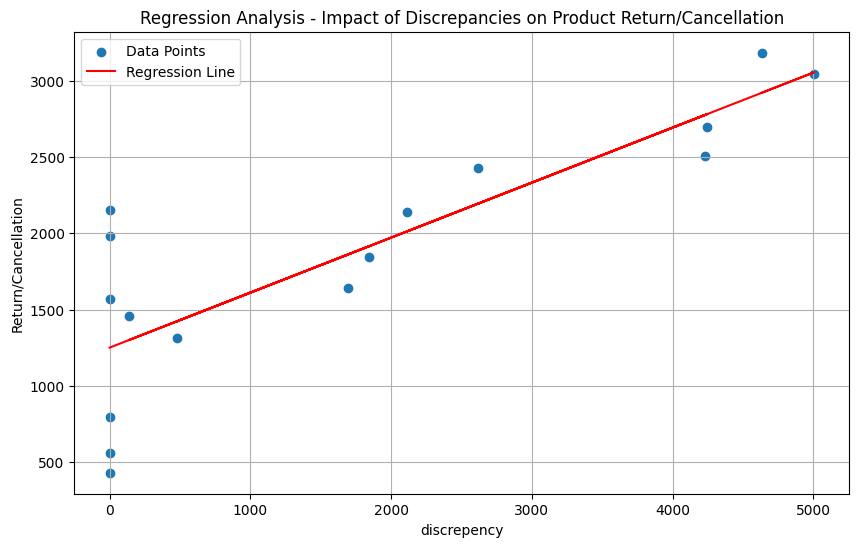

In [ ]:
# Regression Analysis for Product Return/Cancellation with Visualization
X_return = sm.add_constant(stock_data['discrepency'])
y_return = stock_data['return']
model_return = sm.OLS(y_return, X_return).fit()


print(model_return.summary())
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['discrepency'], stock_data['return'], label='Data Points')
plt.plot(stock_data['discrepency'], model_return.predict(), color='red', label='Regression Line')
plt.title('Regression Analysis - Impact of Discrepancies on Product Return/Cancellation')
plt.xlabel('discrepency')
plt.ylabel('Return/Cancellation')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import statsmodels.api as sm

# Define the independent variable (X) and dependent variable (y)
X = sm.add_constant(stock_data['discrepency'])
y = stock_data['revenue']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Extract the t-statistic and p-value for the 'Discrepancy' coefficient
t_statistic = model.tvalues['discrepency']
p_value = model.pvalues['discrepency']

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print('The coefficient for Discrepancy is statistically significant:There is an impact of Discrepancy on Revenue.')
else:
    print('There is no statistically significant evidence of an impact of Discrepancy on Revenue.')


T-Statistic: 5.099466171305961
P-Value: 0.0001618532962874716
The coefficient for Discrepancy is statistically significant:There is an impact of Discrepancy on Revenue.


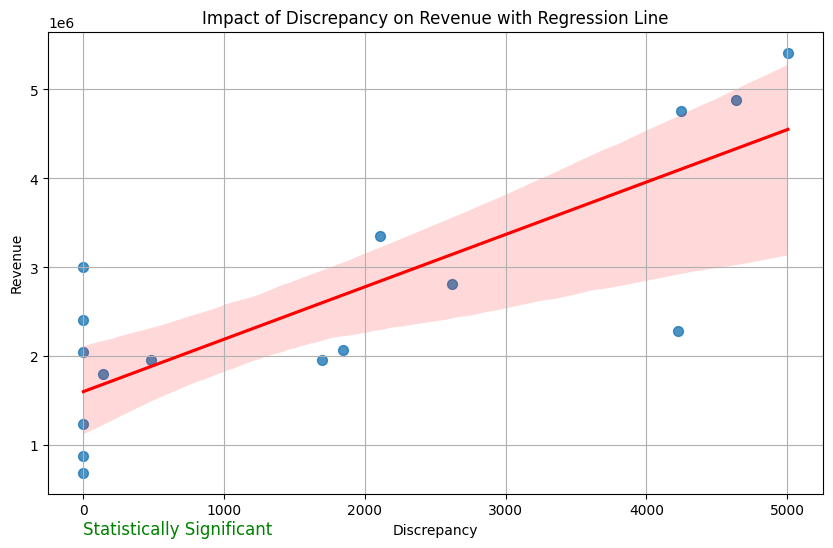

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line and confidence intervals
plt.figure(figsize=(10, 6))
sns.regplot(x='discrepency', y='revenue', data=stock_data, ci=95, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Impact of Discrepancy on Revenue with Regression Line')
plt.xlabel('Discrepancy')
plt.ylabel('Revenue')
plt.grid(True)

# Highlight statistically significant impact
if p_value < 0.05:
    plt.text(0.5, 2500, 'Statistically Significant', fontsize=12, color='green')
else:
    plt.text(0.5, 2500, 'Not Statistically Significant', fontsize=12, color='red')

plt.show()
